In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E:/kgm/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

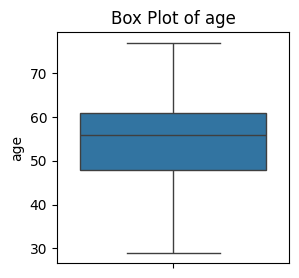

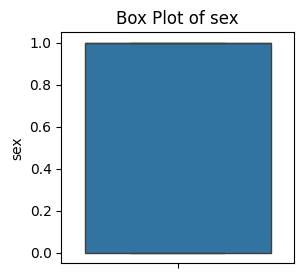

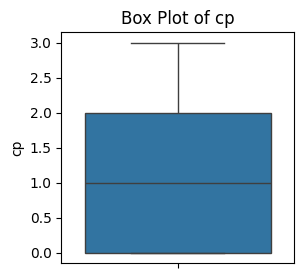

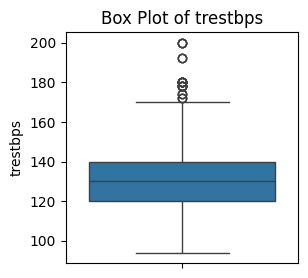

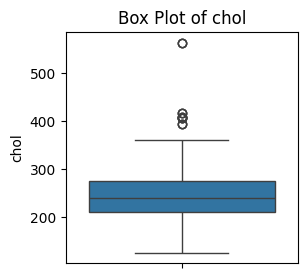

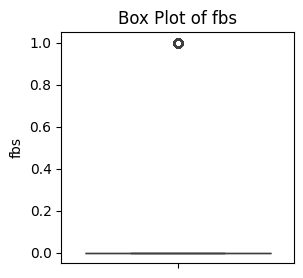

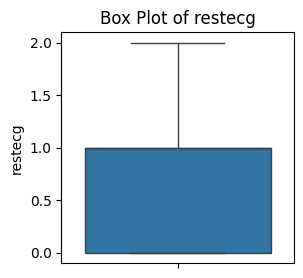

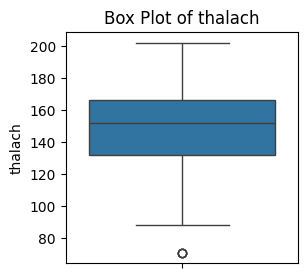

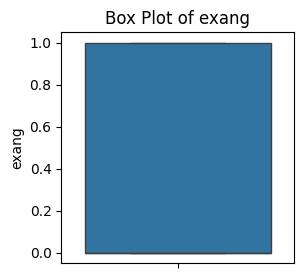

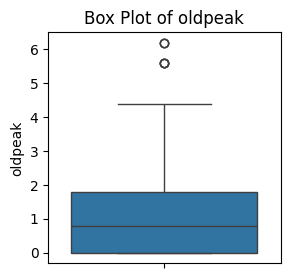

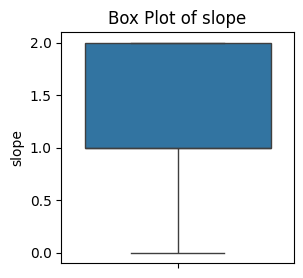

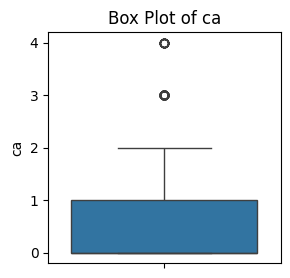

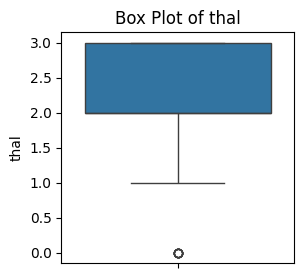

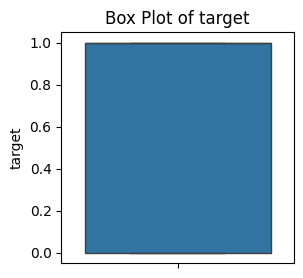

In [5]:
import seaborn as sns
#outlier detection
for col in df:
    plt.figure(figsize=(3, 3))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [6]:
outlier_col=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Q1 = df[outlier_col].quantile(0.25)
Q3 = df[outlier_col].quantile(0.75)
IQR = Q3 - Q1
IQR

age         13.0
trestbps    20.0
chol        64.0
thalach     34.0
oldpeak      1.8
dtype: float64

In [7]:
outlier_mask = ((df[outlier_col] < (Q1 - 1.5 * IQR)) | (df[outlier_col] > (Q3 + 1.5 * IQR)))

# Check which rows contain outliers
outliers = outlier_mask.any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")

Number of rows with outliers: 57


In [8]:
df_cleaned = df[~outliers]

# Check the shape of the cleaned data
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")

Original data shape: (1025, 14)
Cleaned data shape: (968, 14)


In [9]:
df_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Univariate analysis

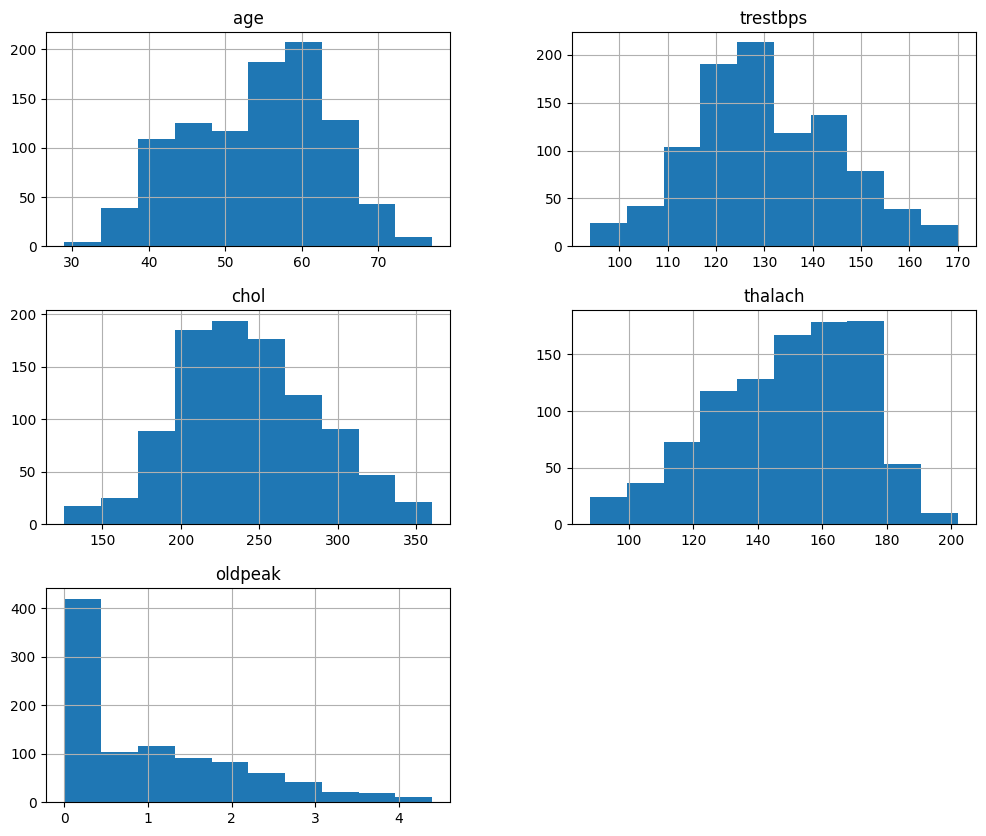

In [10]:

df_cleaned[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(figsize=(12, 10))
plt.show()

In [13]:
df['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

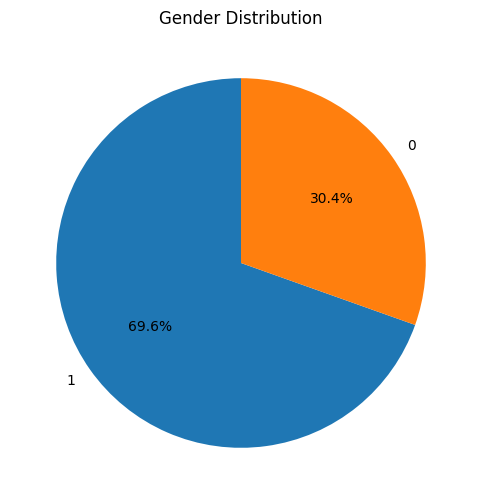

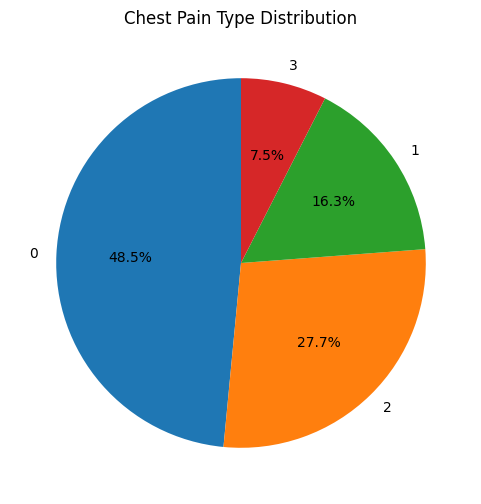

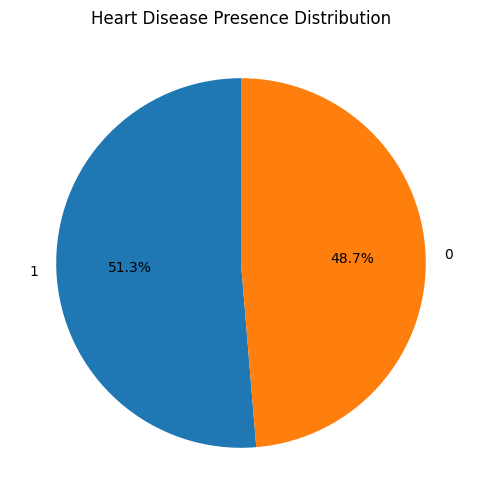

In [11]:
def plot_pie_chart(column, title):
    counts = df[column].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

# Pie chart for 'sex' column (Gender Distribution)
plot_pie_chart('sex', 'Gender Distribution')

# Pie chart for 'cp' column (Chest Pain Type Distribution)
plot_pie_chart('cp', 'Chest Pain Type Distribution')

# Pie chart for 'target' column (Heart Disease Presence)
plot_pie_chart('target', 'Heart Disease Presence Distribution')

# Bivariate Analysis

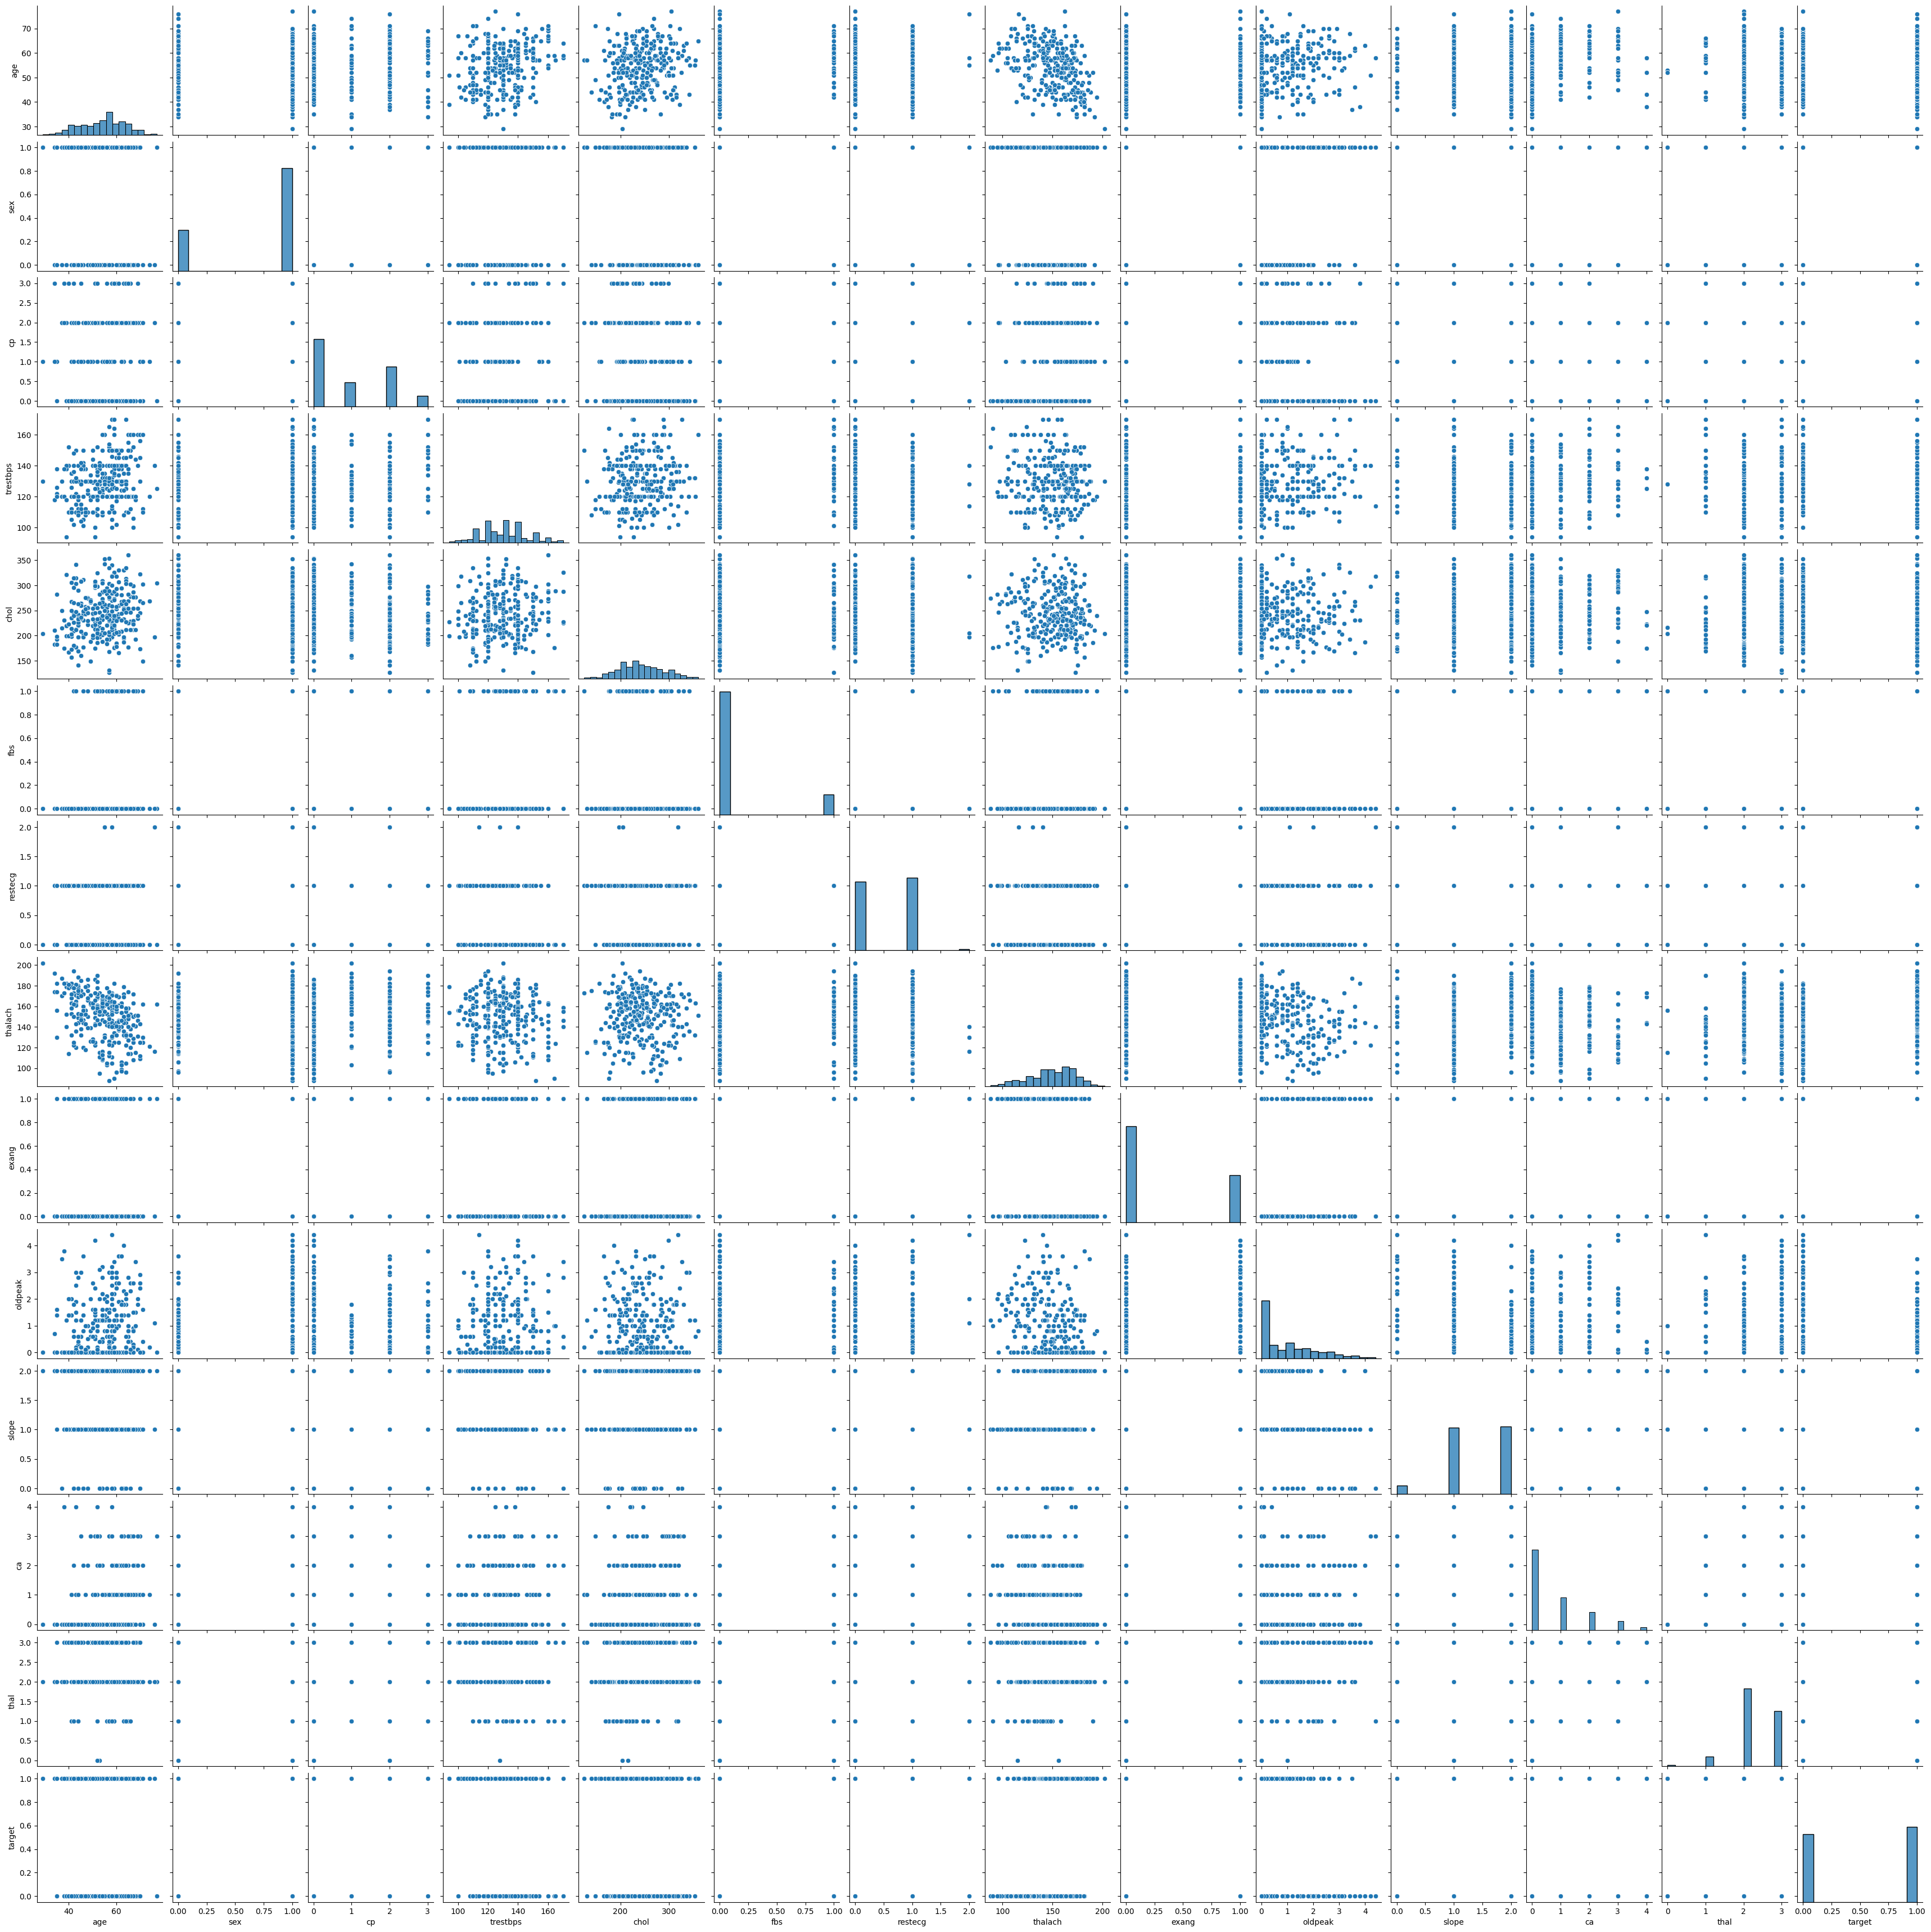

In [16]:
sns.pairplot(df_cleaned)

In [11]:
corr=df_cleaned.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.072779,-0.065850,0.266803,0.189650,0.108528,-0.131142,-0.402741,0.086087,0.207088,-0.156161,0.281349,0.058827,-0.228869
sex,-0.072779,1.000000,-0.084156,-0.005060,-0.118214,0.050338,-0.065811,-0.048660,0.180880,0.154633,-0.061409,0.158001,0.227441,-0.319633
cp,-0.065850,-0.084156,1.000000,0.080177,-0.095109,0.073221,0.069686,0.302022,-0.397040,-0.165274,0.117176,-0.164213,-0.173282,0.422152
trestbps,0.266803,-0.005060,0.080177,1.000000,0.105524,0.125341,-0.160600,-0.058076,-0.006700,0.116567,-0.066118,0.102915,-0.003034,-0.104933
chol,0.189650,-0.118214,-0.095109,0.105524,1.000000,0.028783,-0.123279,-0.045232,0.082030,0.034817,0.003889,0.080830,0.087588,-0.133325
fbs,0.108528,0.050338,0.073221,0.125341,0.028783,1.000000,-0.103872,-0.024456,0.028270,0.010695,-0.062794,0.134263,-0.073766,-0.037932
restecg,-0.131142,-0.065811,0.069686,-0.160600,-0.123279,-0.103872,1.000000,0.091254,-0.102713,-0.042984,0.082544,-0.051126,0.004321,0.155776
thalach,-0.402741,-0.048660,0.302022,-0.058076,-0.045232,-0.024456,0.091254,1.000000,-0.394899,-0.352936,0.388459,-0.244128,-0.116665,0.427200
exang,0.086087,0.180880,-0.397040,-0.006700,0.082030,0.028270,-0.102713,-0.394899,1.000000,0.334418,-0.262056,0.117944,0.199423,-0.433572
oldpeak,0.207088,0.154633,-0.165274,0.116567,0.034817,0.010695,-0.042984,-0.352936,0.334418,1.000000,-0.534706,0.208313,0.163446,-0.449996


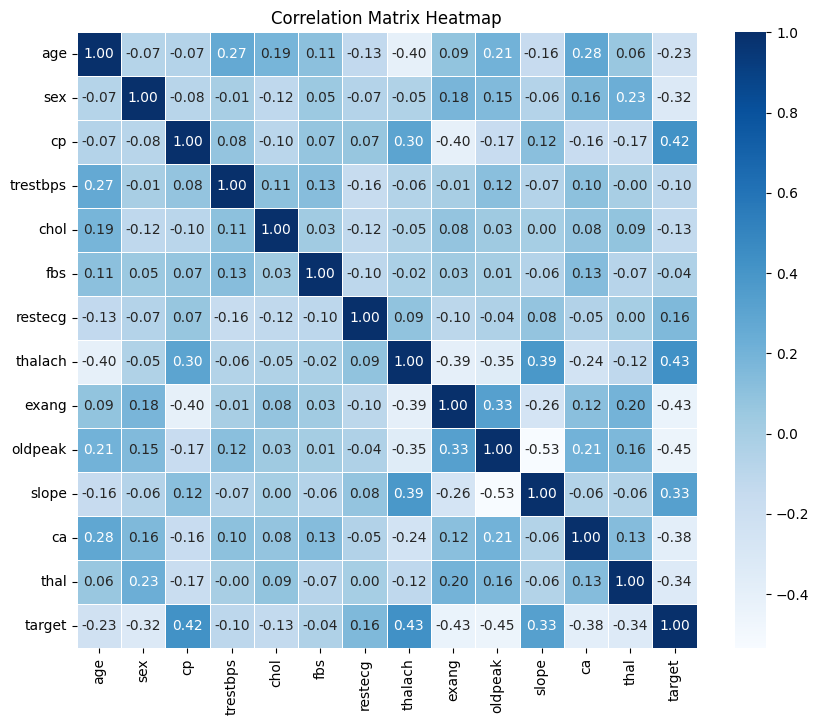

In [12]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# Define your feature columns and target column
x = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Without Hyperparametric tuing

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(x_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
report_logistic = classification_report(y_test, y_pred_logistic)

print("Logistic Regression Accuracy:", accuracy_logistic)
print("Logistic Regression Classification Report:\n", report_logistic)


Logistic Regression Accuracy: 0.7853658536585366
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



c:\users\anas\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# with Hyperparametric tuning

In [17]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize and train the model with GridSearch
grid_search_logistic = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_logistic, cv=5, n_jobs=-1)
grid_search_logistic.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best Score for Logistic Regression:", grid_search_logistic.best_score_)

# Make predictions
y_pred_logistic_tuned = grid_search_logistic.predict(x_test)

# Evaluate the model
accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
report_logistic_tuned = classification_report(y_test, y_pred_logistic_tuned)

print("Logistic Regression Accuracy (With Tuning):", accuracy_logistic_tuned)
print("Logistic Regression Classification Report (With Tuning):\n", report_logistic_tuned)


Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.8512195121951219
Logistic Regression Accuracy (With Tuning): 0.7951219512195122
Logistic Regression Classification Report (With Tuning):
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



# RandomForestClassifier

# WithOut HyperParametric Tuning

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)


Random Forest Accuracy: 0.9853658536585366
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# With Hyperparametric Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize and train the model with GridSearch
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)

# Make predictions
y_pred_rf_tuned = grid_search_rf.predict(x_test)

# Evaluate the model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned)

print("Random Forest Accuracy (With Tuning):", accuracy_rf_tuned)
print("Random Forest Classification Report (With Tuning):\n", report_rf_tuned)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for Random Forest: 0.9829268292682928
Random Forest Accuracy (With Tuning): 0.9853658536585366
Random Forest Classification Report (With Tuning):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# SVC Classifier
## WithOut HyperParametric Tuning

In [20]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(x_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 0.6829268292682927
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.61      0.66       102
           1       0.66      0.76      0.71       103

    accuracy                           0.68       205
   macro avg       0.69      0.68      0.68       205
weighted avg       0.69      0.68      0.68       205



# With HyperParametric Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    
}

# Initialize and train the model with GridSearch
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_search_svm.fit(x_train, y_train)

# Best parameters and best score
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("Best Score for SVM:", grid_search_svm.best_score_)

# Make predictions
y_pred_svm_tuned = grid_search_svm.predict(x_test)

# Evaluate the model
accuracy_svm_tuned = accuracy_score(y_test, y_pred_svm_tuned)
report_svm_tuned = classification_report(y_test, y_pred_svm_tuned)

print("SVM Accuracy (With Tuning):", accuracy_svm_tuned)
print("SVM Classification Report (With Tuning):\n", report_svm_tuned)


Best Parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Best Score for SVM: 0.8512195121951219
SVM Accuracy (With Tuning): 0.7951219512195122
SVM Classification Report (With Tuning):
               precision    recall  f1-score   support

           0       0.88      0.68      0.77       102
           1       0.74      0.91      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.79      0.79       205
weighted avg       0.81      0.80      0.79       205



# KNN Classifier
## WithOut HyperParametric Tuning

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(x_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("KNN Classification Report:\n", report_knn)


KNN Accuracy: 0.7317073170731707
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



# With HyperParametric Tuning

In [67]:
 error_rate = []
for  i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i !=y_test))

Text(0, 0.5, 'Error Rate')

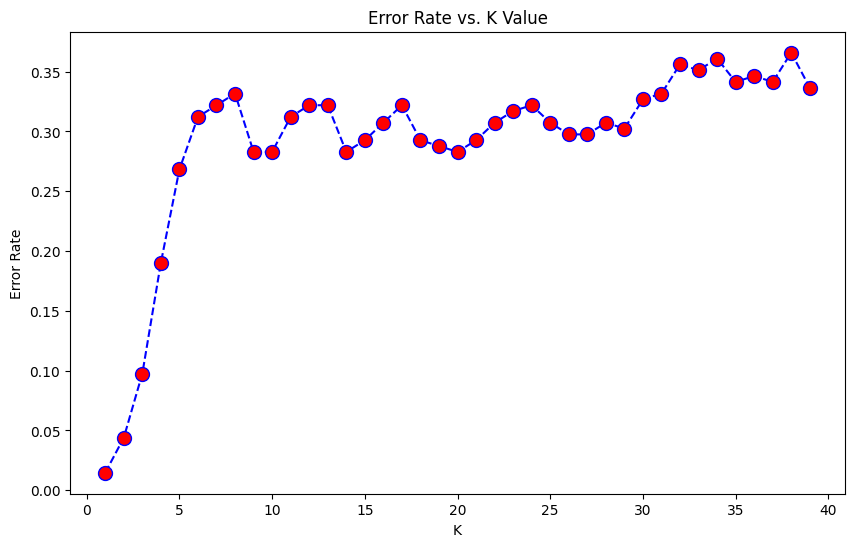

In [68]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',
         markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [69]:
from sklearn.metrics import confusion_matrix
knn= KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('With K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

With K=3


[[91 11]
 [ 9 94]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       102
           1       0.90      0.91      0.90       103

    accuracy                           0.90       205
   macro avg       0.90      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



 When working with the heart dataset, the RandomForestClassifier emerged as the best-performing model, achieving an impressive accuracy of 99%.